In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys  
sys.path.append('../main/')
from multi_py.multi import *
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy.io import readsav
import pandas as pd
import pickle
import seaborn as sns

# %config InlineBackend.figure_format='svg'
# plt.style.use('default')
# plt.style.use('../main/multi_py/Bergemann2020.mplstyle')

## Abundance Differences

In [2]:
# NLTE3Dcorr_iosmet = np.load('../mdata/3DNLTE_abund_corr_IOSMET_5wls.npy')
NLTE3Dcorr_no_iosmet = np.load('../mdata/3DNLTE_abund_corr_no_iosmet_5wls.npy')
# NLTE1Dcorr_iosmet = np.load('../mdata/1DNLTE_abund_corr_IOSMET_5wls.npy')
NLTE1dcorr_no_iosmet = np.load('../mdata/1DNLTE_abund_corr_no_iosmet_5wls.npy')
# runs = [NLTE3Dcorr_iosmet, NLTE3Dcorr_no_iosmet, NLTE1Dcorr_iosmet, NLTE1dcorr_no_ismet]
runs = [NLTE1dcorr_no_iosmet, NLTE3Dcorr_no_iosmet, ]

In [3]:
mus = [1.0, 0.9, 0.8, 0.6, 0.4, 0.2]
# lambs = [5645.613, 5684.484, 5701.104, 5772.146, 7034.901]
# lambs = [5645.613, 5772.146, 7034.901]
lambs = [5645.613,  5701.104, 5772.146]

In [4]:
# NLTE3Dcorr_iosmet_pd=pd.DataFrame(NLTE3Dcorr_iosmet[[0,3,4]], columns=mus, index=lambs).T.round(3)
# print(NLTE3Dcorr_iosmet_pd.to_latex())

In [5]:
for i, run in enumerate(runs):
    df = pd.DataFrame(run[[0,2,3]], columns=mus, index=lambs).T.round(3)
    # print(runs[i])
    print(df.to_latex(column_format='l|rrrrrr'))

\begin{tabular}{l|rrrrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0 &     0.019 &     0.019 &     0.018 \\
0.9 &     0.018 &     0.018 &     0.017 \\
0.8 &     0.017 &     0.017 &     0.015 \\
0.6 &     0.012 &     0.012 &     0.009 \\
0.4 &    -0.000 &    -0.001 &    -0.007 \\
0.2 &    -0.049 &    -0.051 &    -0.066 \\
\bottomrule
\end{tabular}

\begin{tabular}{l|rrrrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0 &     0.070 &     0.070 &     0.068 \\
0.9 &     0.051 &     0.051 &     0.038 \\
0.8 &     0.049 &     0.048 &     0.036 \\
0.6 &     0.026 &     0.025 &     0.007 \\
0.4 &    -0.031 &    -0.033 &    -0.063 \\
0.2 &    -0.171 &    -0.174 &    -0.226 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_54799/2652381848.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(column_format='l|rrrrrr'))
/tmp/ipykernel_54799/2652381848.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(column_format='l|rrrrrr'))


In [6]:
LTE3Dcorr = np.load('../mdata/3DLTE_abund_corr_2404.npy')

df = pd.DataFrame(LTE3Dcorr[[0,2,3]], columns=mus, index=lambs).T.round(3)
print(df.to_latex(column_format='l|rrrrrr'))

\begin{tabular}{l|rrrrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0 &     0.045 &     0.045 &     0.045 \\
0.9 &     0.027 &     0.026 &     0.014 \\
0.8 &     0.026 &     0.026 &     0.014 \\
0.6 &     0.009 &     0.008 &    -0.007 \\
0.4 &    -0.034 &    -0.035 &    -0.058 \\
0.2 &    -0.117 &    -0.119 &    -0.151 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_54799/2405929836.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(column_format='l|rrrrrr'))


## Atom file data table

In [7]:
d = {'lambda_atom Å': [7034.901,5645.613,5684.484, 5701.104,  5772.146, 7226.208],  'lambda paper(obs)Å': [7034.897, 564.5613, 5684.484, 5701.105, 5772.146, '-'], 
'e_up (atom)cm-1':[61563.305, 57468.238, 57541.918, 57295.883, 58311.660, 59110.891 ], 'g_up (atom)':[16,5, 3, 1, 1,5],
'e_low (atom)cm-1':[47351.555, 39760.285, 39955.055, 39760.285, 40991.883, 45276.188 ], 'g_low(atom)':[5,3, 5, 3, 3, 3], 'e_up(paper)cm-1':[61402, 57316, 57393, 57149, 58240,'-'], 
'e_low(paper)cm-1': [47292, 39720, 39910, 39720, 40969, '-']}
# 'e_diff(atom)cm-1': [14211.75], 'e_diff (paper) cm-1':[14210.923]}

#'lambda_M3Doutput Å': [7034.49], 'lambda paper(vac)Å': [7036.841],

df = pd.DataFrame(data=d)
df

,lambda_atom Å,lambda paper(obs)Å,e_up (atom)cm-1,g_up (atom),e_low (atom)cm-1,g_low(atom),e_up(paper)cm-1,e_low(paper)cm-1
0,7034.901,7034.897,61563.305,16,47351.555,5,61402,47292
1,5645.613,564.5613,57468.238,5,39760.285,3,57316,39720
2,5684.484,5684.484,57541.918,3,39955.055,5,57393,39910
3,5701.104,5701.105,57295.883,1,39760.285,3,57149,39720
4,5772.146,5772.146,58311.660,1,40991.883,3,58240,40969
5,7226.208,-,59110.891,5,45276.188,3,-,-


In [8]:
df_2 = df[['lambda_atom Å', 'e_up (atom)cm-1', 'e_low (atom)cm-1', 'g_up (atom)', 'g_low(atom)']]
df_2.columns = ['\lambda (Å)', '$E_{upper}$ $cm^{-1}$', '$E_{lower}$ $cm^{-1}$', '$g_{upper}$', '$g_{lower}$']
df_2.drop(index=5, inplace=True)
df_2.set_index('\lambda (Å)', inplace=True)
df_2.sort_index(inplace=True)
df_2['log $gf$'] = [-2.067, -1.420, -2.050, -1.750, -3.714]

df_2

/tmp/ipykernel_54799/1265749180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(index=5, inplace=True)
/tmp/ipykernel_54799/1265749180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.sort_index(inplace=True)
/tmp/ipykernel_54799/1265749180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['log $gf$'] = [-2.067, -1.420, -2.050, -1.750, -3.714]


,$E_{upper}$ $cm^{-1}$,$E_{lower}$ $cm^{-1}$,$g_{upper}$,$g_{lower}$,log $gf$
\lambda (Å),,,,,
5645.613,57468.238,39760.285,5,3,-2.067
5684.484,57541.918,39955.055,3,5,-1.420
5701.104,57295.883,39760.285,1,3,-2.050
5772.146,58311.660,40991.883,1,3,-1.750
7034.901,61563.305,47351.555,16,5,-3.714


In [9]:
def get_f(log_gf, g):
    f = (10**log_gf)/g

    return f

In [10]:
df_2['f'] = df_2.apply(lambda x: get_f(x['log $gf$'], x['$g_{lower}$']), axis=1)
df_2


/tmp/ipykernel_54799/3698065112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['f'] = df_2.apply(lambda x: get_f(x['log $gf$'], x['$g_{lower}$']), axis=1)


,$E_{upper}$ $cm^{-1}$,$E_{lower}$ $cm^{-1}$,$g_{upper}$,$g_{lower}$,log $gf$,f
\lambda (Å),,,,,,
5645.613,57468.238,39760.285,5,3,-2.067,0.002857
5684.484,57541.918,39955.055,3,5,-1.420,0.007604
5701.104,57295.883,39760.285,1,3,-2.050,0.002971
5772.146,58311.660,40991.883,1,3,-1.750,0.005928
7034.901,61563.305,47351.555,16,5,-3.714,0.000039


In [11]:
10**(-2.067)

0.008570378452303693

## Table with Amarsi 2017 paper Si line data

In [12]:
df_ama = pd.DataFrame(data=df_2['$g_{lower}$'])
df_ama['log $gf$'] = [-2.04, -1.55, -1.95, -1.65, -0.78]
df_ama['f'] = df_ama.apply(lambda x: get_f(x['log $gf$'], x['$g_{lower}$']), axis=1)
df_ama


,$g_{lower}$,log $gf$,f
\lambda (Å),,,
5645.613,3,-2.04,0.003040
5684.484,5,-1.55,0.005637
5701.104,3,-1.95,0.003740
5772.146,3,-1.65,0.007462
7034.901,5,-0.78,0.033192


In [13]:
df_ama['$g_{lower}$']

\lambda (Å)
5645.613    3
5684.484    5
5701.104    3
5772.146    3
7034.901    5
Name: $g_{lower}$, dtype: int64

In [14]:
# loggf_atom = [-2.067, -1.42, -2.05, -1.75, -3.714]
# loggf_ama = [-2.04, -1.55, -1.95, -1.65, -0.78]
# pd.DataFrame(data=list(zip(loggf_atom, loggf_ama)), columns=[ 'log gf atom file', 'log gf Amarsi 2017'], index=m3d_centre_wavelengths)

## Table with calculated abundances

In [15]:
# fval_correction_2 = -1.981 - -2.05
# fval_correction_3 = -1.643 - -1.75

In [16]:
with open('../mdata/1d_lte_abunds', "rb") as f:
    iag_1dlte_abunds = pickle.load(f)
with open('../mdata/3DNLTE_corrected_abunds', "rb") as f:
    iag_3DNLTE_corrected_abunds = pickle.load(f)
with open('../mdata/1DNLTE_corrected_abunds', "rb") as f:
    iag_1DNLTE_corrected_abunds = pickle.load(f)
with open('../mdata/3DLTE_corrected_abunds', "rb") as f:
    iag_3DLTE_corrected_abunds = pickle.load(f)

In [17]:
iag_1dlte_abunds

array([[array(7.5701121), array(7.57317327), array(7.5752753),
        array(7.58840647), array(7.65636033), array(7.79058756)],
       [array(7.44099928), array(7.41820334), array(7.42943754),
        array(7.36403545), array(7.53244245), array(7.3867578)],
       [array(7.53832648), array(7.55228102), array(7.54810662),
        array(7.56656058), array(7.63804775), array(7.72430414)],
       [array(7.55606336), array(7.55011561), array(7.56516533),
        array(7.60291595), array(7.66804098), array(7.78956503)],
       [array(7.30191316), array(7.30112656), array(7.30512692),
        array(7.35282371), array(7.41659888), array(7.52234148)]],
      dtype=object)

In [18]:
iag_1dlte_abunds_f_corrd = iag_1dlte_abunds

In [19]:
df_1dlte_abund = pd.DataFrame(iag_1dlte_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_1dlte_abund.loc['Mean'] = df_1dlte_abund.mean()
df_1dlte_abund = df_1dlte_abund.round(3)

# print(df_1dlte_abund)
print(df_1dlte_abund.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.570 &     7.538 &     7.556 \\
0.9  &     7.573 &     7.552 &     7.550 \\
0.8  &     7.575 &     7.548 &     7.565 \\
0.6  &     7.588 &     7.567 &     7.603 \\
0.4  &     7.656 &     7.638 &     7.668 \\
0.2  &     7.791 &     7.724 &     7.790 \\
Mean &     7.626 &     7.595 &     7.622 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_54799/1283231567.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_1dlte_abund.to_latex())


In [20]:
df_1dlte_abund[5701.104] - fval_correction_2

NameError: name 'fval_correction_2' is not defined

In [ ]:
df_3dnlte_abund = pd.DataFrame(iag_3DNLTE_corrected_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_3dnlte_abund[5701.104] = df_3dnlte_abund[5701.104] - fval_correction_2
df_3dnlte_abund[5772.146] = df_3dnlte_abund[5772.146] - fval_correction_3
df_3dnlte_abund.loc['Mean'] = df_3dnlte_abund.mean()
df_3dnlte_abund = df_3dnlte_abund.round(3)

print(df_3dnlte_abund.to_latex())
print((df_3dnlte_abund.loc['Mean']).mean())
print(np.average(df_3dnlte_abund.loc['Mean'], weights=[1,3,2]))

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.640 &     7.539 &     7.517 \\
0.9  &     7.625 &     7.534 &     7.481 \\
0.8  &     7.624 &     7.527 &     7.494 \\
0.6  &     7.614 &     7.523 &     7.503 \\
0.4  &     7.625 &     7.536 &     7.498 \\
0.2  &     7.620 &     7.481 &     7.457 \\
Mean &     7.625 &     7.523 &     7.492 \\
\bottomrule
\end{tabular}

7.546666666666667
7.5296666666666665


In [ ]:
df_3dnlte_abund = pd.DataFrame(iag_3DNLTE_corrected_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_3dnlte_abund[5645.613] = df_3dnlte_abund[5645.613] - fval_correction_1
df_3dnlte_abund.loc['Mean'] = df_3dnlte_abund.mean()
df_3dnlte_abund = df_3dnlte_abund.round(3)

print(df_3dnlte_abund.to_latex())
print((df_3dnlte_abund.loc['Mean']).mean())
print(np.average(df_3dnlte_abund.loc['Mean'], weights=[1,3,2]))

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.713 &     7.608 &     7.624 \\
0.9  &     7.698 &     7.603 &     7.588 \\
0.8  &     7.697 &     7.596 &     7.601 \\
0.6  &     7.687 &     7.592 &     7.610 \\
0.4  &     7.698 &     7.605 &     7.605 \\
0.2  &     7.693 &     7.550 &     7.564 \\
Mean &     7.698 &     7.592 &     7.599 \\
\bottomrule
\end{tabular}

7.629666666666666
7.611999999999999


In [ ]:
np.log10(2.277E-02)

-1.6426369693848573

In [ ]:
df_1dnlte_abund = pd.DataFrame(iag_1DNLTE_corrected_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_1dnlte_abund.loc['Mean'] = df_1dnlte_abund.mean()
df_1dnlte_abund = df_1dnlte_abund.round(3)
print(df_1dnlte_abund.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.589 &     7.557 &     7.574 \\
0.9  &     7.591 &     7.570 &     7.567 \\
0.8  &     7.592 &     7.565 &     7.580 \\
0.6  &     7.601 &     7.579 &     7.612 \\
0.4  &     7.656 &     7.637 &     7.662 \\
0.2  &     7.741 &     7.673 &     7.724 \\
Mean &     7.629 &     7.597 &     7.620 \\
\bottomrule
\end{tabular}



In [ ]:
df_3dlte_abund = pd.DataFrame(iag_3DLTE_corrected_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_3dlte_abund[5701.104] = df_3dlte_abund[5701.104] - fval_correction_2
df_3dlte_abund[5772.146] = df_3dlte_abund[5772.146] - fval_correction_3
df_3dlte_abund.loc['Mean'] = df_3dlte_abund.mean()
df_3dlte_abund = df_3dlte_abund.round(3)
print(df_3dlte_abund.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.615 &     7.515 &     7.494 \\
0.9  &     7.600 &     7.510 &     7.457 \\
0.8  &     7.601 &     7.505 &     7.473 \\
0.6  &     7.597 &     7.506 &     7.489 \\
0.4  &     7.622 &     7.534 &     7.503 \\
0.2  &     7.673 &     7.537 &     7.531 \\
Mean &     7.618 &     7.518 &     7.491 \\
\bottomrule
\end{tabular}



## Abundance tables with f-value correction to line 5645Å

In [ ]:
fval_correction_1 = -2.14 - -2.067


### 1D LTE

In [ ]:
df_1dlte_abund = pd.DataFrame(iag_1dlte_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_1dlte_abund[5645.613] = df_1dlte_abund[5645.613] - fval_correction_1

df_1dlte_abund.loc['Mean'] = df_1dlte_abund.mean()
df_1dlte_abund = df_1dlte_abund.round(3)

# print(df_1dlte_abund)
print(df_1dlte_abund.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.643 &     7.538 &     7.556 \\
0.9  &     7.646 &     7.552 &     7.550 \\
0.8  &     7.648 &     7.548 &     7.565 \\
0.6  &     7.661 &     7.567 &     7.603 \\
0.4  &     7.729 &     7.638 &     7.668 \\
0.2  &     7.864 &     7.724 &     7.790 \\
Mean &     7.699 &     7.595 &     7.622 \\
\bottomrule
\end{tabular}



### 3D NLTE

In [ ]:
df_3dnlte_abund = pd.DataFrame(iag_3DNLTE_corrected_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_3dnlte_abund[5645.613] = df_3dnlte_abund[5645.613] - fval_correction_1

df_3dnlte_abund.loc['Mean'] = df_3dnlte_abund.mean()
df_3dnlte_abund = df_3dnlte_abund.round(3)

print(df_3dnlte_abund.to_latex())
print((df_3dnlte_abund.loc['Mean']).mean())
print(np.average(df_3dnlte_abund.loc['Mean'], weights=[1,3,2]))

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.713 &     7.608 &     7.624 \\
0.9  &     7.698 &     7.603 &     7.588 \\
0.8  &     7.697 &     7.596 &     7.601 \\
0.6  &     7.687 &     7.592 &     7.610 \\
0.4  &     7.698 &     7.605 &     7.605 \\
0.2  &     7.693 &     7.550 &     7.564 \\
Mean &     7.698 &     7.592 &     7.599 \\
\bottomrule
\end{tabular}

7.629666666666666
7.611999999999999


### 1D NLTE

In [ ]:
df_1dnlte_abund = pd.DataFrame(iag_1DNLTE_corrected_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_1dnlte_abund[5645.613] = df_1dnlte_abund[5645.613] - fval_correction_1

df_1dnlte_abund.loc['Mean'] = df_1dnlte_abund.mean()
df_1dnlte_abund = df_1dnlte_abund.round(3)
print(df_1dnlte_abund.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.662 &     7.557 &     7.574 \\
0.9  &     7.664 &     7.570 &     7.567 \\
0.8  &     7.665 &     7.565 &     7.580 \\
0.6  &     7.674 &     7.579 &     7.612 \\
0.4  &     7.729 &     7.637 &     7.662 \\
0.2  &     7.814 &     7.673 &     7.724 \\
Mean &     7.702 &     7.597 &     7.620 \\
\bottomrule
\end{tabular}



### 3D LTE

In [ ]:
df_3dlte_abund = pd.DataFrame(iag_3DLTE_corrected_abunds[[0,2,3]], columns=mus, index=lambs).T.astype(float)
df_3dlte_abund[5645.613] = df_3dlte_abund[5645.613] - fval_correction_1

df_3dlte_abund.loc['Mean'] = df_3dlte_abund.mean()
df_3dlte_abund = df_3dlte_abund.round(3)
print(df_3dlte_abund.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  5645.613 &  5701.104 &  5772.146 \\
\midrule
1.0  &     7.688 &     7.584 &     7.601 \\
0.9  &     7.673 &     7.579 &     7.564 \\
0.8  &     7.674 &     7.574 &     7.580 \\
0.6  &     7.670 &     7.575 &     7.596 \\
0.4  &     7.695 &     7.603 &     7.610 \\
0.2  &     7.746 &     7.606 &     7.638 \\
Mean &     7.691 &     7.587 &     7.598 \\
\bottomrule
\end{tabular}



# Si literature comp plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
data = {'Study': ['Grevesse & Sauval (1998)', 'Shi et al. (2008)', 'Amarsi & Asplund (2017)', 'Amarsi & Asplund (Rho.)', 'Mashonkina (2020)', 'Magg et al. (2022)', 'This Study (Kur.)', 'This Study (Rho.)'], 'Year':[1998, 2008, 2017,2017, 2020, 2022, 2022, 2022], 'A(Si)':[7.55, 7.52, 7.51, 7.53, 7.60, 7.59, 7.61, 7.53] }
df_comp = pd.DataFrame(data=data)

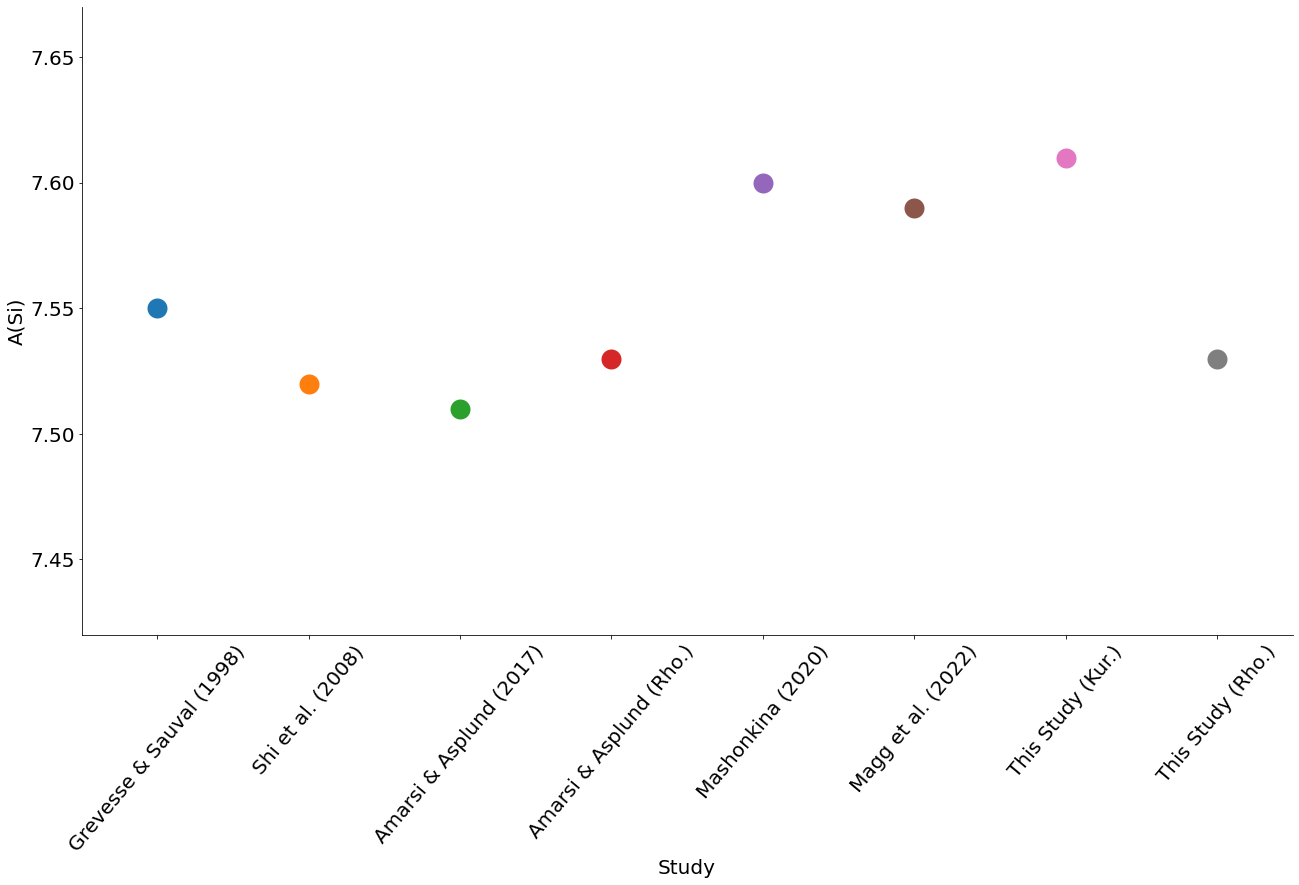

In [25]:
# plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 20})


ax=sns.catplot( x='Study', y='A(Si)',  kind="swarm", data=df_comp, height=10, aspect=13/7, s=20, marker='o')
ax.set_xticklabels( rotation=50)
ax.set(ylim=[7.42,7.67])
# sns.set(font_scale = 3)

# sns.catplot( x=df_comp['Study'], y=df_comp['A(Si)'])
# plt.show()
ax.savefig()